### IMPORT LIBRARIES

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score

### LOAD DATASET

In [4]:
data=pd.read_csv('Housing.csv')

In [5]:
df=pd.DataFrame(data)

In [6]:
df.head(545)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [7]:
#data walkthrough
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.shape

(545, 13)

In [9]:
#search for duplicate rows based on all columns

In [10]:
duplicate_rows =df.duplicated()

In [11]:
duplicate_rows

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

In [12]:
#No duplicate row found

### SORTING OUT CATEGORICAL AND NUMERICAL COLUMNS

In [14]:
categorical_data=[cols for cols in df.columns if df[cols].dtype=='object']

In [15]:
categorical_data

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [16]:
# Sorting out numerical data

In [17]:
numerical_data = [cols for cols in df.columns if df[cols].dtype == 'int64']

In [18]:
numerical_data

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [19]:
for cols in categorical_data:
    print(cols)
    print('*'*50)
    print(df[cols].value_counts())

mainroad
**************************************************
yes    468
no      77
Name: mainroad, dtype: int64
guestroom
**************************************************
no     448
yes     97
Name: guestroom, dtype: int64
basement
**************************************************
no     354
yes    191
Name: basement, dtype: int64
hotwaterheating
**************************************************
no     520
yes     25
Name: hotwaterheating, dtype: int64
airconditioning
**************************************************
no     373
yes    172
Name: airconditioning, dtype: int64
prefarea
**************************************************
no     417
yes    128
Name: prefarea, dtype: int64
furnishingstatus
**************************************************
semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


### VISUALIZE DATA

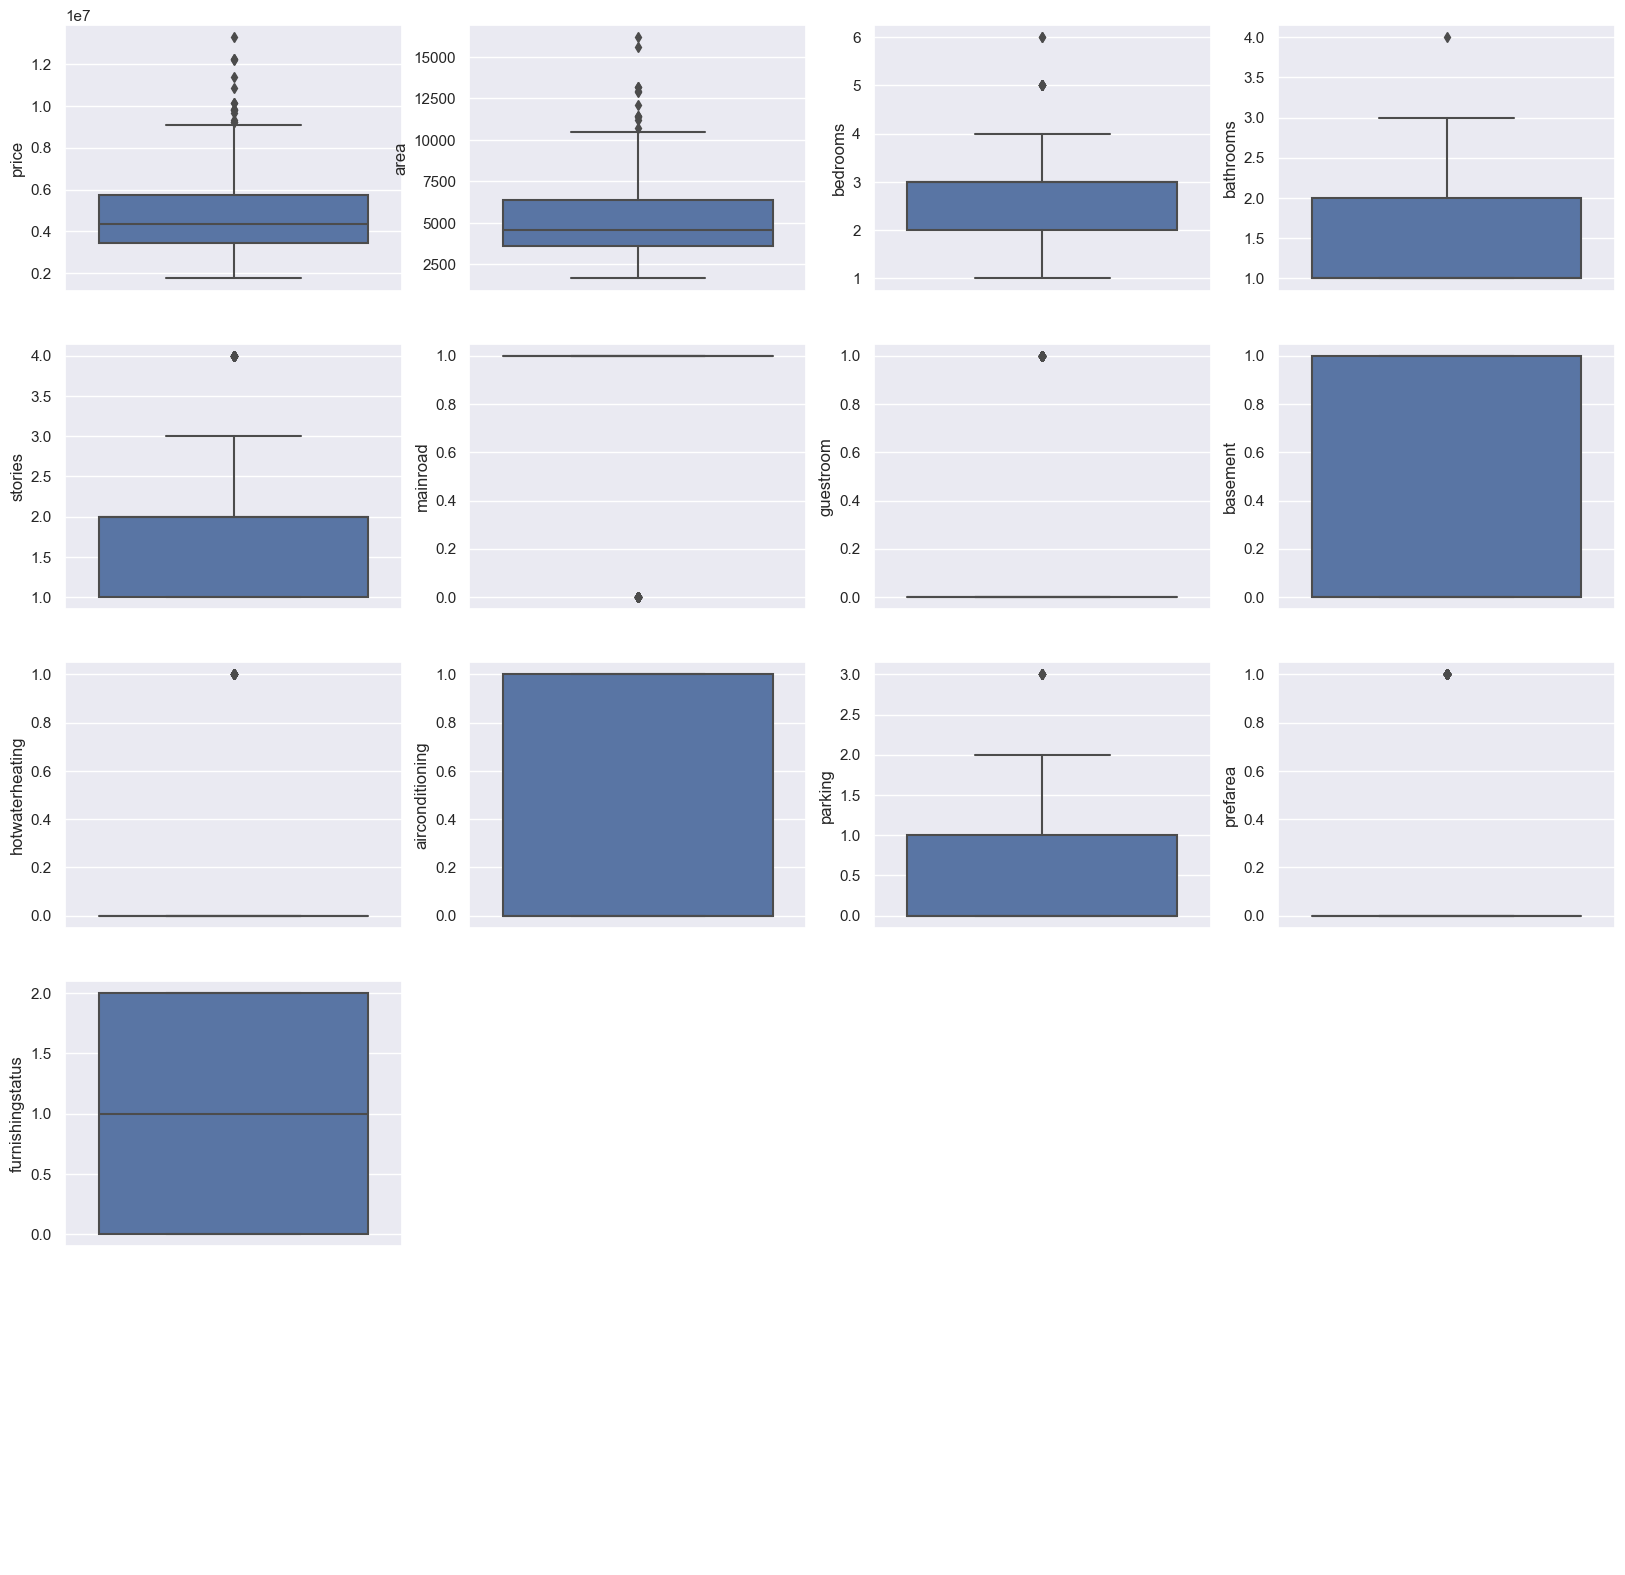

In [179]:
fig, axes = plt.subplots(5,4, figsize=(20,20))

for ax in axes.flatten():
    ax.set_axis_off()

for col, ax in zip(df.columns, axes.flatten()):
    ax.set_axis_on()
    sns.boxplot(data=df, y=col, ax=ax)

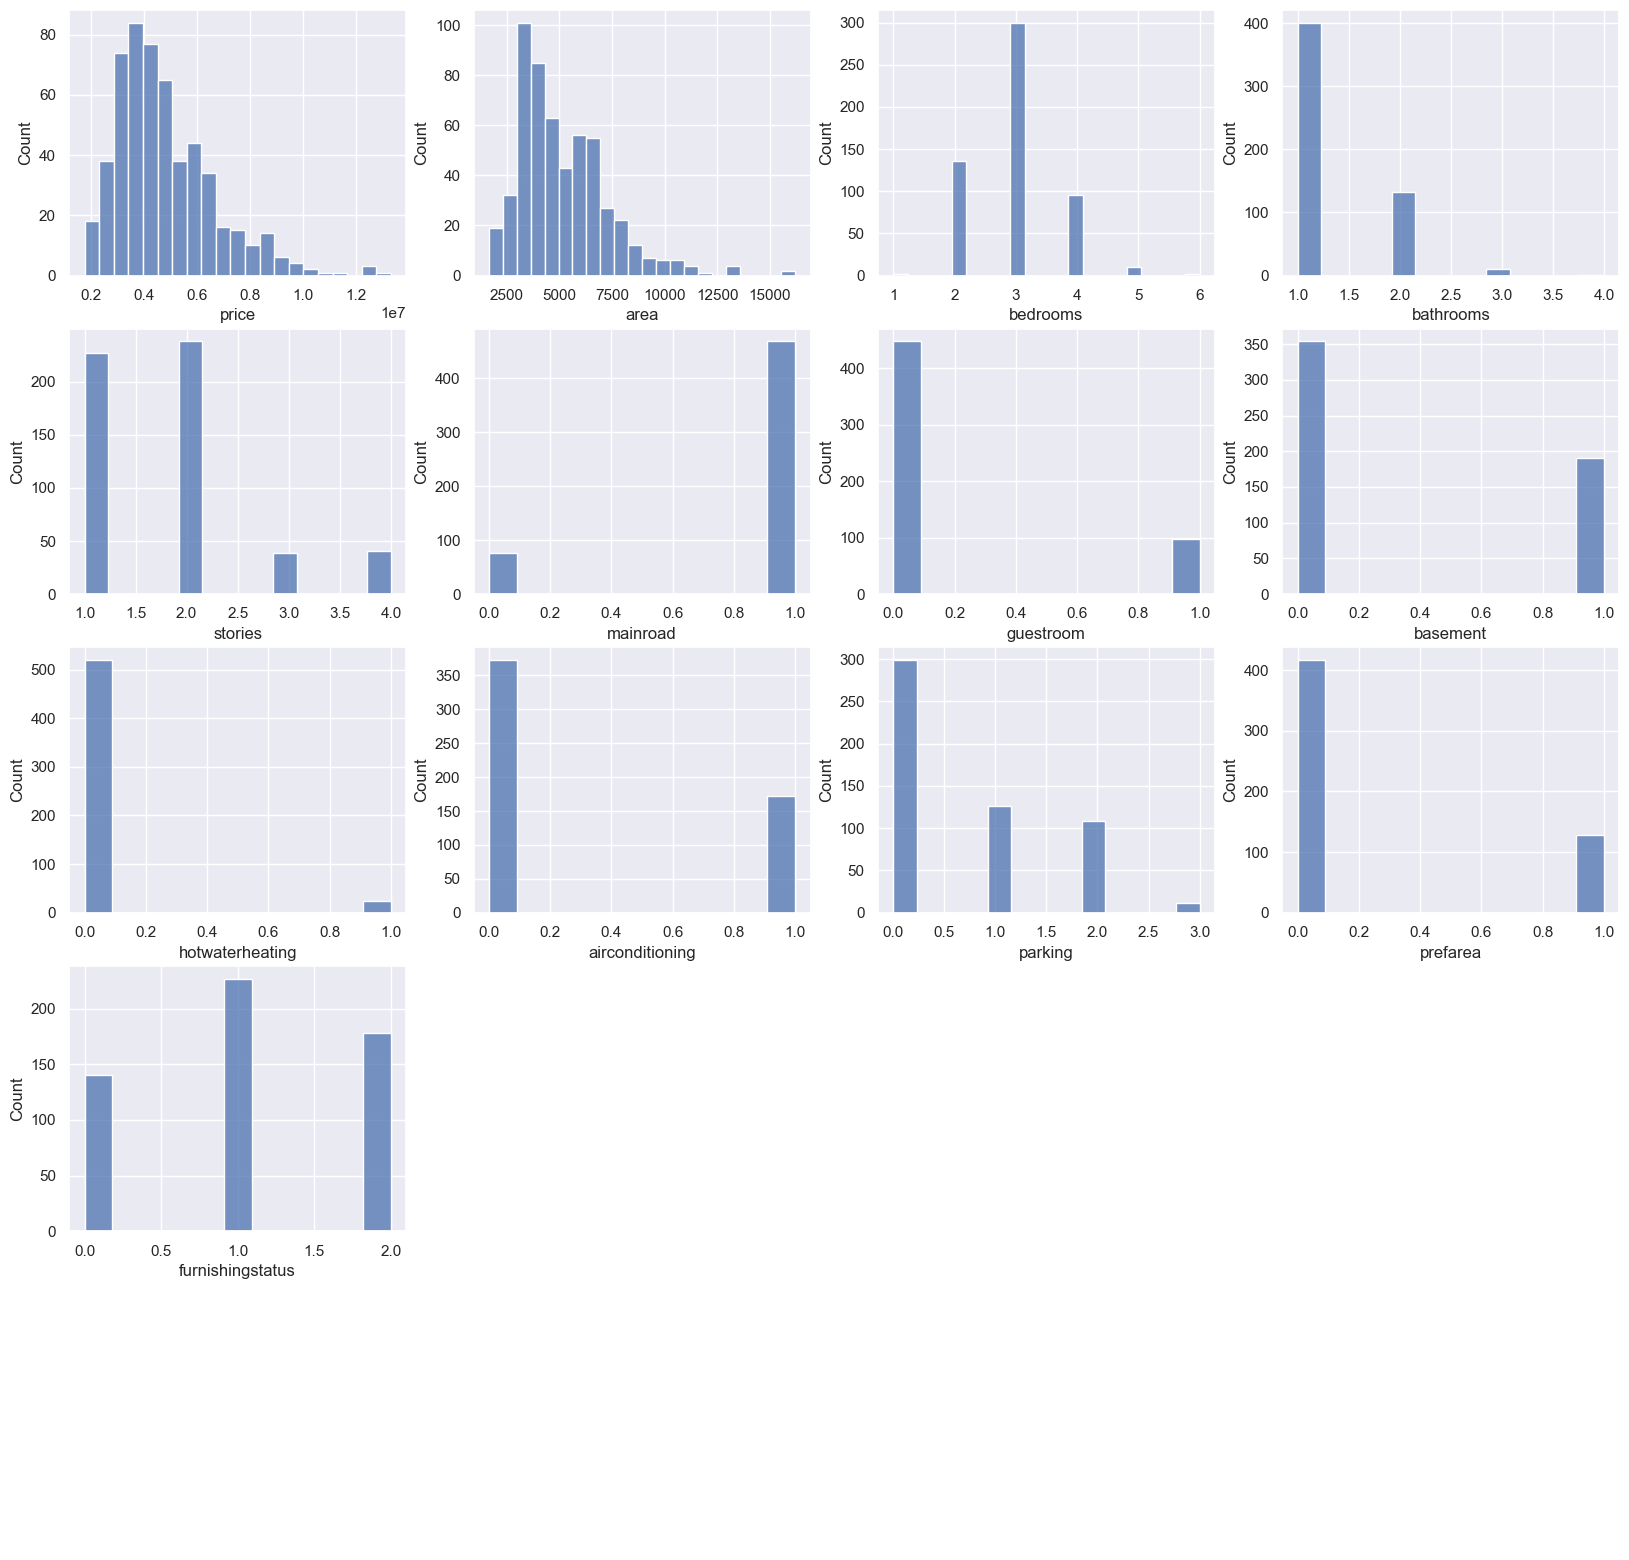

In [129]:
fig, axes = plt.subplots(5,4, figsize=(20,20))

for ax in axes.flatten():
    ax.set_axis_off()

for col, ax in zip(df.columns, axes.flatten()):
    ax.set_axis_on()
    sns.histplot(data=df, x=col, ax=ax)

#### REMOVING OUTLIER FROM DATASET

In [174]:
# removing oulier from price column
# for col in df.columns:
#     q1_price = df['price'].quantile(0.25)
#     q3_price = df['price'].quantile(0.75)
#     IQR = q3_price -q1_price
#     outlier_price = (df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))
# no_outlier_df = df[~outlier_price]

In [224]:
# no_outlier_df

In [225]:
# sns.boxplot(data=no_outlier_price, y='price')

In [25]:
#set default theme
sns.set_theme()

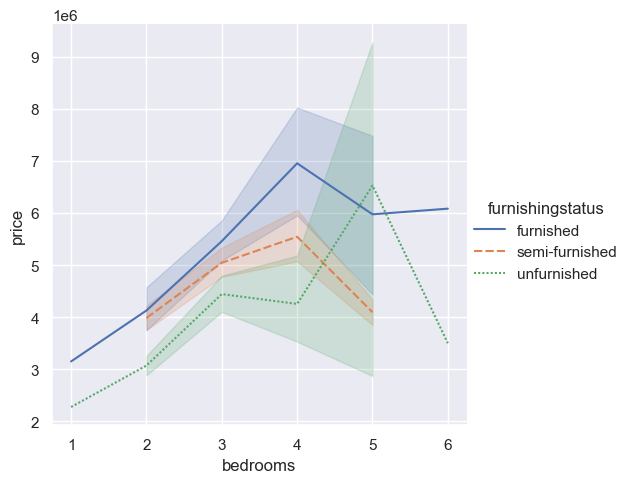

In [26]:
# Load dataset
# Invoke the rplot method
sns.relplot(data = data, kind='line', x='bedrooms', y='price', hue='furnishingstatus', style= 'furnishingstatus')

## Predicting house prices with Linear Regression

In [180]:
no_outlier_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [181]:
#looping though the dataframe to identify categorical data
    # Create an empty list to store the names of categorical columns
    # Loop through the columns and identify categorical columns
    
categorical_columns = []
for column in no_outlier_df.columns:
    if no_outlier_df[column].dtype == 'object':
        categorical_columns.append(column)
        

In [182]:
#create an instance of the ordinal encoder
ordinal_encoder = OrdinalEncoder()

In [183]:
#loop through categorical columns and encode them
for column in categorical_columns:
    df[column] = ordinal_encoder.fit_transform(df[[column]])

In [184]:
print(no_outlier_df)

       price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
405  3465000  3060         3          1        1       1.0        0.0   
406  3465000  5320         2          1        1       1.0        0.0   
407  3465000  2145         3          1        3       1.0        0.0   
408  3430000  4000         2          1        1       1.0        0.0   
409  3430000  3185         2          1        1       1.0        0.0   
..       ...   ...       ...        ...      ...       ...        ...   
540  1820000  3000         2          1        1       1.0        0.0   
541  1767150  2400         3          1        1       0.0        0.0   
542  1750000  3620         2          1        1       1.0        0.0   
543  1750000  2910         3          1        1       0.0        0.0   
544  1750000  3850         3          1        2       1.0        0.0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
405       0.0              0.0              0.0      

In [32]:
#separate features from target variable

In [200]:
features = df[['area', 'bedrooms', 'bathrooms', 'hotwaterheating', 'stories', 'mainroad',
       'guestroom', 'basement', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]

In [201]:
target = df['price']

In [202]:
target.shape

(545,)

In [203]:
features.shape

(545, 12)

In [204]:
target.shape

(545,)

### TRAIN THE DATASET

In [205]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=42)

### LINEAR REGRESSION

In [206]:
# fit your split data into the linear regression model

In [207]:
linreg = LinearRegression()

In [208]:
linreg.fit(x_train, y_train)

LinearRegression()

In [209]:
#print the intercept and coefficient
print(f'intercept value: {linreg.intercept_ }')
print(f'coeficient values: {linreg.coef_ }')

intercept value: 285145.9643941056
coeficient values: [ 2.39846499e+02  7.22127240e+04  1.12558958e+06  6.92196148e+05
  3.85890372e+05  3.71839795e+05  2.72092676e+05  4.01496586e+05
  7.66673437e+05  2.59487246e+05  6.27828389e+05 -2.07066774e+05]


### PREDICTION

In [210]:
predicted_values = linreg.predict(x_test)

In [211]:
predicted_values

array([5258901.38185144, 7235978.26767803, 3074804.23583165,
       4529833.40768993, 3334896.01433317, 3582738.80172692,
       5714243.9760778 , 6467048.23130885, 2835600.38875236,
       2660849.63108369, 9630459.37389798, 2842313.73261652,
       3185820.22397591, 3337108.41428338, 3710547.88871678,
       5378935.52640573, 2971407.75080161, 4822100.37745742,
       4420946.55161184, 3544903.37307763, 5727172.69682827,
       5883080.54651171, 2773957.48051698, 4829182.2944597 ,
       5336729.04157344, 7626687.64636574, 3313472.54946864,
       5289712.58575654, 8251940.93695112, 3418321.02376057,
       6444901.46074548, 3364669.02442553, 6760319.30470108,
       4150512.06584206, 3574340.45808844, 5818971.63009337,
       4870818.06284827, 4359955.31593047, 3200469.78833818,
       4637248.74391467, 4610986.65539389, 3536073.83412229,
       7216790.54779044, 4037836.79163614, 3724788.24702379,
       4336414.93399043, 6667050.22679661, 4008515.20067887,
       3829521.92083308,

#### VARIANCE USING R-SQUARED (R2) SCORE:

In [238]:
r2 = r2_score(y_test, predicted_values)

In [239]:
r2

0.6614628548582817

In [240]:
percentage_value = round(r2*100, 2)

In [241]:
print('*'*50)
print('*'*50)
print(f'R-squared value of this model is:: {percentage_value}%')


**************************************************
**************************************************
R-squared value of this model is:: 66.15%


### RIDGE REGRESSION

In [242]:
ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(x_train, y_train)

Ridge()

In [243]:
ridge_score = ridge_model.score(x_test, y_test)

In [230]:
print('*'*50)
print('*'*50)
print(f'Ridge Regression r2 score: {round(ridge_score, 4)*100}')
print('*'*50)

**************************************************
**************************************************
Ridge Regression r2 score: 66.12
**************************************************


### LASSO REGRESSION

In [219]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train, y_train)

Lasso()

In [220]:
lasso_score = lasso_model.score(x_test, y_test)

In [231]:
print('*'*50)
print('*'*50)
print(f'Lasso Regression r2 score: {round(lasso_score, 4)*100}%')
print('*'*50)

**************************************************
**************************************************
Lasso Regression r2 score: 66.14999999999999%
**************************************************


### OUTLIER DETECTION

In [223]:
lower_bound

-35000.0

In [57]:
upper_bound

9205000.0

### RESIDUAL GRAPH

In [236]:
residual = y_test-predicted_values

In [234]:
residual

316   -1.198901e+06
77    -5.859783e+05
360    6.351958e+05
90     1.910167e+06
493   -5.348960e+05
           ...     
172   -1.708637e+06
124   -5.428502e+05
388    2.676996e+05
521    9.240165e+03
503   -4.774231e+05
Name: price, Length: 137, dtype: float64

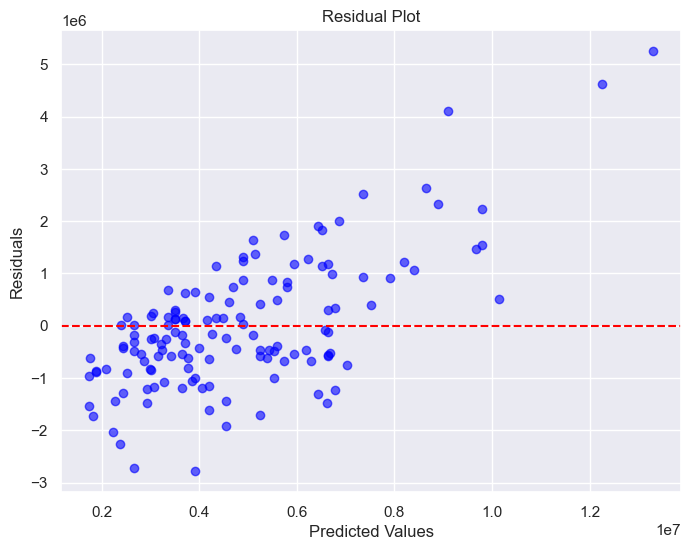

In [237]:
# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residual, c='blue', marker='o', alpha=0.6)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()